In [6]:
###################################################
############### DATA MINING HW3 ###################
############### 2017311146 권솔 ###################
###################################################

### in my regclass function,
# regclass function does not need any input values.
# just excute regclass()
# then the function will automatically ask you all the information needed. 

import numpy as np
import numpy.linalg as lin
import os as os
import pandas as pd
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3


#os.chdir("C://Users/sol/Desktop/Sol/Master/DM/data/")


In [ ]:
wd = input("Where is your data file located? ")
os.chdir(wd)

In [8]:
def regclass():
    ans = input("Enter your goal: Regression or Classification? ")
    wd = input("Where is your data file located? ")
    os.chdir(wd)
    
    if ans == "Regression":
        data = input("Enter the data file name: ")
        fm = eval(input("Select the data coding format(1 = 'a b c' or 2 = 'a,b,c'): "))
        if fm==1:
            form=' '
        else:
            form=","
        data = pd.read_table(data, header=None, sep=form)
    
        linreg(data)
    
    elif ans == "Classification":
        train = input("Enter your training data file name: ")
        test = input("Enter your test data file name: ")
        fm = eval(input("Select the data coding format(1 = 'a b c' or 2 = 'a,b,c'): "))
        if fm==1:
            form=' '
        else:
            form=","
        train = pd.read_table(train, header=None, sep=form)
        test = pd.read_table(test, header=None, sep=form)
        ldaqda = eval(input("Select whether you want to perform LDA or QDA, enter 1 or 2 or 3 (1= LDA or 2= QDA or 3= RDA): "))
        if ldaqda == 1:
            ldaclass(train, test)
        elif ldaqda == 2:
            qdaclass(train, test)
        elif ldaqda == 3:
            rdaclass(train, test)
        else:
            print(print("You have to enter the number 1,2 or 3"))
    
    else:
        print("You have to enter the words Regression or Classification")

Enter your goal: Regression or Classification? Classification
Where is your data file located? C://Users/sol/Desktop/Sol/Master/DM/data
Enter your training data file name: veh.dat
Enter your test data file name: vehtest.dat
Select the data coding format(1 = 'a b c' or 2 = 'a,b,c'): 2
Select whether you want to perform LDA or QDA, enter 1 or 2 or 3 (1= LDA or 2= QDA or 3= RDA): 3
Select the column index of response variable (0,1,2, ...): 18


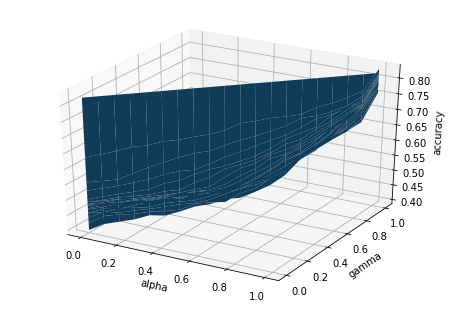

Enter the result file name: result55


In [9]:
regclass()

In [2]:
def linreg(data):
    # select response variable
    yindex = eval(input("Select the column index of response variable (0,1,2, ...): "))
    y = data.iloc[:,yindex]
    yvec = np.array(y)
    
    ### linear regression algorithm
    # design matrix
    n = len(data.index)
    xmat = pd.DataFrame(data.iloc[:,np.repeat(yindex,len(list(data))) != list(data)])
    one = pd.DataFrame(np.repeat(1,len(data.index)))
    xmat = np.matrix(pd.concat([one, xmat], axis=1))
        
    # r-squared, mse
    onemat = np.matrix(one)
    h0 = np.matmul(np.matmul(onemat, lin.inv(np.matmul(onemat.transpose(),onemat))),onemat.transpose())
    h = np.matmul(np.matmul(xmat, lin.inv(np.matmul(xmat.transpose(),xmat))),xmat.transpose())
    ssto = np.matmul(np.matmul(yvec.transpose(),(np.matrix(np.identity(n),copy=False)-h0)),yvec)[0,0]
    sse = np.matmul(np.matmul(yvec.transpose(),(np.matrix(np.identity(n),copy=False)-h)),yvec)[0,0]
    rsq = 1-sse/ssto
    p = xmat.shape[1]
    mse = sse/(n-p)
    
    # output file name
    resultname = input("Enter the result file name: ")
    resultname = resultname+'.txt'
    
    ### output material
    # betahat coefficients for each X
    betahat = np.matmul(np.matmul(lin.inv(np.matmul(xmat.transpose(),xmat)),xmat.transpose()),yvec)
    betahat = np.array(betahat).transpose()
    # yhat
    yhat = np.matmul(xmat, betahat).transpose()
    # id number
    idnum = np.array(list(range(1,len(data.index)))).transpose()

    
    with open(resultname, 'w') as text_file:
        print("Coefficients", file=text_file)
        print("-------------", file=text_file)
        print("Constant:" + 1*' ' + str(round(betahat[0][0],3)), file=text_file)
        for i in range(1,p):
            print("Beta" + str(i) + ":" + 1*' ' + str(round(betahat[i][0],3)), file=text_file)
        print("", file=text_file)
        print("ID, Actual Values, Fitted Values", file=text_file)
        print("-------------", file=text_file)
        for i in range(0,n-1):
            print(str(idnum[i]) + ',' + 1*' ' + str(yvec[i]) + ',' + 1*' ' + str(round(yhat[0,i],1)), file=text_file)
        print("", file=text_file)
        print("Model Summary", file=text_file)
        print("-------------", file=text_file)
        print("R-Sqaure" + 1*' ' + ':' + 1*' ' + '.' + '{0:g}'.format(float('%.4f' % rsq)*10000), file=text_file)
        print("MSE" + 1*' ' + ':' + 1*' ' + str(mse), file=text_file)

In [3]:
def ldaclass(train, test):
    # getting y index
    yindex = eval(input("Select the column index of response variable (0,1,2, ...): "))
    # getting sample size of training and test data
    nxtrain = train.shape[0]
    nxtest = test.shape[0]
    # getting the number of groups
    k = len(np.unique(train.iloc[:,yindex]))
    # train and test data frames
    traindf = train.iloc[:,0:yindex]
    testdf = test.iloc[:,0:yindex]
    
    # group mean
    meank = train.groupby(yindex).mean().transpose()
    # group count
    nk = np.array(train.groupby(yindex).count().iloc[:,0])
    
    # pooled covariance matrix
    sp= np.matrix([[0 for i in range(0,yindex)] for i in range(0,yindex)])
    for i in range(0,k):
        cov = np.matrix(np.split(train.groupby(yindex).cov(),k)[i])*(nk[i]-1)
        sp = sp+cov
    sp= sp/(sum(nk-1))
    sp= lin.inv(sp)

    ##### defining discriminant function - left, middle, right part
    ### training data
    # left part
    left_train = np.matrix([[0 for i in range(k)] for i in range(nxtrain)])
    for i in range(nxtrain):
        for j in range(k):
            left_train[i,j] = np.matmul(np.matmul(meank.iloc[:,j],sp),np.matrix(traindf)[i,:].transpose()).item(0)
    
    # middle part
    middle=[0 for i in range(k)]
    for i in range(0,4):
        middle[i]=np.matmul(np.matmul(np.matrix(meank.iloc[:,i]),sp),np.matrix(meank.iloc[:,i]).transpose()).item(0)/2
    middle = np.array(middle)
    
    # right part - prior
    right = np.log(nk/sum(nk))
    
    # discriminant function
    disc_train = np.matrix([[0 for i in range(k)] for i in range(nxtrain)])
    for i in range(nxtrain):
        for j in range(k):
            disc_train[i,j] = left_train[i,j] - middle[j] + right[j]
    
    # getting result
    result_train = [0 for i in range(0,nxtrain)]
    for i in range(nxtrain):
        result_train[i] = np.argmax(disc_train[i,:])+1
    result_train = np.array(result_train)
    
    # result file
    resultname = input("Enter the result file name: ")
    resultname = resultname+'.txt'
    
    # training data result summary
    idnum_train = np.array(list(range(1,len(train.index)+1))).transpose()
    confmat_train = pd.DataFrame()
    confmat_train['Actual Class'] = train.iloc[:,yindex]
    confmat_train['Predicted Class'] = result_train
    confmatdf_train = pd.DataFrame(np.nan_to_num(np.matrix(confmat_train.groupby(['Actual Class','Predicted Class']).size().unstack())))
    acc_train = sum(np.diagonal(np.matrix(confmatdf_train)))/nxtrain
    
    ### test data
    # left part
    left_test = np.matrix([[0 for i in range(k)] for i in range(nxtest)])
    for i in range(nxtest):
        for j in range(k):
            left_test[i,j] = np.matmul(np.matmul(meank.iloc[:,j],sp),np.matrix(testdf)[i,:].transpose()).item(0)
    
    # discriminant function
    disc_test = np.matrix([[0 for i in range(k)] for i in range(nxtest)])
    for i in range(nxtest):
        for j in range(k):
            disc_test[i,j] = left_test[i,j] - middle[j] + right[j]
    
    # getting result
    result_test = [0 for i in range(0,nxtest)]
    for i in range(nxtest):
        result_test[i] = np.argmax(disc_test[i,:])+1
    result_test = np.array(result_test)
    
    # test data result summary
    idnum_test = np.array(list(range(1,len(test.index)+1))).transpose()
    confmat_test = pd.DataFrame()
    confmat_test['Actual Class'] = test.iloc[:,yindex]
    confmat_test['Predicted Class'] = result_test
    confmatdf_test = pd.DataFrame(np.nan_to_num(np.matrix(confmat_test.groupby(['Actual Class','Predicted Class']).size().unstack())))
    acc_test = sum(np.diagonal(np.matrix(confmatdf_test)))/nxtest
    
    
    with open(resultname, 'w') as text_file:
        print("ID, Actual class, Resub pred", file=text_file)
        print("-----------------------------", file=text_file)
        for i in range(0,nxtrain):
            print(str(idnum_train[i]) + ',' + 1*' ' + str(train.iloc[i,yindex]) + ',' + 1*' ' + str(result_train[i]), file=text_file)
        print("", file=text_file)
        print("Confusion Matrix (Resubstitution)", file=text_file)
        print("----------------------------------", file=text_file)
        print(confmatdf_train, file=text_file)
        print("", file=text_file)
        print("Model Summary (Resubstitution)", file=text_file)
        print("------------------------------", file=text_file)
        print("Overall accuracy =" + 1*' '+'.'+'{0:g}'.format(float('%.3f' % acc_train)*1000), file=text_file)
        print("", file=text_file)
        print("ID, Actual class, Test pred", file=text_file)
        print("-----------------------------", file=text_file)
        for i in range(0,nxtest):
            print(str(idnum_test[i]) + ',' + 1*' ' + str(test.iloc[i,yindex]) + ',' + 1*' ' + str(result_test[i]), file=text_file)
        print("", file=text_file)
        print("Confusion Matrix (Test)", file=text_file)
        print("----------------------------------", file=text_file)
        print(confmatdf_test, file=text_file)
        print("", file=text_file)
        print("Model Summary (Resubstitution)", file=text_file)
        print("------------------------------", file=text_file)
        print("Overall accuracy =" + 1*' '+'.'+'{0:g}'.format(float('%.3f' % acc_test)*1000), file=text_file)


In [4]:
def qdaclass(train, test):
    # getting y index
    yindex = eval(input("Select the column index of response variable (0,1,2, ...): "))
    # getting sample size of training and test data
    nxtrain = train.shape[0]
    nxtest = test.shape[0]
    # getting the number of groups
    k = len(np.unique(train.iloc[:,yindex]))
    # train and test data frames
    traindf = train.iloc[:,0:yindex]
    testdf = test.iloc[:,0:yindex]
    
    # group mean
    meank = train.groupby(yindex).mean().transpose()
    # group count
    nk = np.array(train.groupby(yindex).count().iloc[:,0])
    
    ##### defining discriminant function
    ### training data
    # left part
    left = [0 for i in range(0,k)]
    skdict= {}
    for i in range(0,k):
        skdict[i] = np.matrix(np.split(train.groupby(yindex).cov(),k)[i])
        left[i] = -np.log(lin.det(skdict[i]))/2
    
    # covariance matrix for k groups
    skinv = {}
    for i in range(0,k):
        skinv[i] = lin.inv(np.matrix(np.split(train.groupby(yindex).cov(),k)[i]))
        
    # middle part
    middlek_train = np.matrix([[0 for i in range(0,k)] for i in range(0,nxtrain)])
    for i in range(0,nxtrain):
        for j in range(0,k):
            middlek_train[i,j]=np.matmul(np.matmul((np.matrix(traindf.iloc[i,:]-meank.iloc[:,j])),skinv[j]),np.matrix(traindf.iloc[i,:]-meank.iloc[:,j]).transpose()).item(0)
    middlek_train = middlek_train/2
    
    # right part
    right = np.log(nk/sum(nk))
    
    # discriminant function
    qdisc_train = np.matrix([[0 for i in range(0,k)] for i in range(0,nxtrain)])
    for i in range(nxtrain):
        for j in range(k):
            qdisc_train[i,j] = left[j] - middlek_train[i,j] + right[j]
    
    # getting result
    result_train = [0 for i in range(0,nxtrain)]
    for i in range(nxtrain):
        result_train[i] = np.argmax(qdisc_train[i,:])+1
    result_train = np.array(result_train)
    
    # result file
    resultname = input("Enter the result file name: ")
    resultname = resultname+'.txt'
    
    # training data result summary
    idnum_train = np.array(list(range(1,len(train.index)+1))).transpose()
    confmat_train = pd.DataFrame()
    confmat_train['Actual Class'] = train.iloc[:,yindex]
    confmat_train['Predicted Class'] = result_train
    confmatdf_train = pd.DataFrame(confmat_train.groupby(['Actual Class','Predicted Class']).size().unstack()).fillna(0)
    acc_train = sum(np.diagonal(np.matrix(confmatdf_train)))/nxtrain
    
    ### test data
    # middle part
    middlek_test = np.matrix([[0 for i in range(0,k)] for i in range(0,nxtest)])
    for i in range(0,nxtest):
        for j in range(0,k):
            middlek_test[i,j]=np.matmul(np.matmul((np.matrix(testdf.iloc[i,:]-meank.iloc[:,j])),skinv[j]),np.matrix(testdf.iloc[i,:]-meank.iloc[:,j]).transpose()).item(0)
    middlek_test = middlek_test/2
    
    # discriminant function
    qdisc_test = np.matrix([[0 for i in range(0,k)] for i in range(0,nxtest)])
    for i in range(nxtest):
        for j in range(k):
            qdisc_test[i,j] = left[j] - middlek_test[i,j] + right[j]
    
    # getting result
    result_test = [0 for i in range(0,nxtest)]
    for i in range(nxtest):
        result_test[i] = np.argmax(qdisc_test[i,:])+1
    result_test = np.array(result_test)    

    # test data result summary
    idnum_test = np.array(list(range(1,len(test.index)+1))).transpose()
    confmat_test = pd.DataFrame()
    confmat_test['Actual Class'] = test.iloc[:,yindex]
    confmat_test['Predicted Class'] = result_test
    confmatdf_test = pd.DataFrame(confmat_test.groupby(['Actual Class','Predicted Class']).size().unstack()).fillna(0)
    acc_test = sum(np.diagonal(np.matrix(confmatdf_test)))/nxtest
    
    with open(resultname, 'w') as text_file:
        print("ID, Actual class, Resub pred", file=text_file)
        print("-----------------------------", file=text_file)
        for i in range(0,nxtrain):
            print(str(idnum_train[i]) + ',' + 1*' ' + str(train.iloc[i,yindex]) + ',' + 1*' ' + str(result_train[i]), file=text_file)
        print("", file=text_file)
        print("Confusion Matrix (Resubstitution)", file=text_file)
        print("----------------------------------", file=text_file)
        print(confmatdf_train, file=text_file)
        print("", file=text_file)
        print("Model Summary (Resubstitution)", file=text_file)
        print("------------------------------", file=text_file)
        print("Overall accuracy =" + 1*' '+'.'+'{0:g}'.format(float('%.3f' % acc_train)*1000), file=text_file)
        print("", file=text_file)
        print("ID, Actual class, Test pred", file=text_file)
        print("-----------------------------", file=text_file)
        for i in range(0,nxtest):
            print(str(idnum_test[i]) + ',' + 1*' ' + str(test.iloc[i,yindex]) + ',' + 1*' ' + str(result_test[i]), file=text_file)
        print("", file=text_file)
        print("Confusion Matrix (Test)", file=text_file)
        print("----------------------------------", file=text_file)
        print(confmatdf_test, file=text_file)
        print("", file=text_file)
        print("Model Summary (Resubstitution)", file=text_file)
        print("------------------------------", file=text_file)
        print("Overall accuracy =" + 1*' '+'.'+'{0:g}'.format(float('%.3f' % acc_test)*1000), file=text_file)    

In [5]:
def rdaclass(train, test):
    # getting y index
    yindex = eval(input("Select the column index of response variable (0,1,2, ...): "))
    # getting sample size of training and test data
    nxtrain = train.shape[0]
    nxtest = test.shape[0]
    # getting the number of groups
    k = len(np.unique(train.iloc[:,yindex]))
    # train and test data frames
    traindf = train.iloc[:,0:yindex]
    testdf = test.iloc[:,0:yindex]
    
    # group mean
    meank = train.groupby(yindex).mean().transpose()
    # group count
    nk = np.array(train.groupby(yindex).count().iloc[:,0])
    
    ## right; prior part - equal prior
    right = np.log(nk/sum(nk))
    
    ## mid; quadratic form part
    # mean difference for training data
    meandiff_train=[]
    for i in range(k):
        mdnewval_train = meank.iloc[:,i].append([meank.iloc[:,i]]*(nxtrain-1)).values.reshape(nxtrain,yindex)
        mdnewval_train = traindf - mdnewval_train
        meandiff_train.append(mdnewval_train)
    
    # mean difference for test data
    meandiff_test=[]
    for i in range(k):
        mdnewval_test = meank.iloc[:,i].append([meank.iloc[:,i]]*(nxtest-1)).values.reshape(nxtest,yindex)
        mdnewval_test = testdf - mdnewval_test
        meandiff_test.append(mdnewval_test)    
    
    # covariance matrix used in QDA
    sk = np.split(train.groupby(yindex).cov(),k)
    
    # pooled covariance matrix used in LDA
    sp= np.matrix([[0 for i in range(0,yindex)] for i in range(0,yindex)])
    for i in range(k):
        cov = np.matrix(np.split(train.groupby(yindex).cov(),k)[i])*(nk[i]-1)
        sp = sp+cov
    sp= sp/(sum(nk-1))
    
    # Cov=diag(sigma) case; used in Minimum Distance Classifier
    sigidmat = np.diagonal(sp).mean() * np.identity(yindex)
    
    ### choosing alpha and gamma parameters which minimize test errors
    # make a and c do the work as alpha and gamma    
    
    acc_test = np.matrix([[0 for i in range(20)] for i in range(20)])
    for a in range(20):
        for c in range(20):
            pred_test=[]
            for i in range(k):
                #skac = a*sk + (1-a)*(c*spk + (1-c)*sigidmat)
                skac = (1+a)/20*sk[i]+(1-(1+a)/20)*(((1+c)/20)*sp+(1-(1+c)/20)*sigidmat)
                skac_inv = lin.inv(skac)
                
                # left part
                left_test = -np.log(lin.det(skac))/2
                # quadratic form; Mid part
                mid_test = np.diag(np.matmul(np.matmul(meandiff_test[i],skac_inv),meandiff_test[i].transpose()))*(-1/2)
                # prediction result
                pred_test_val = left_test+mid_test+right[i]
                pred_test.append(pred_test_val)
            # finding and adjusting result value from 0,1,2,... to 1,2,3,...
            result = pd.DataFrame(pred_test).idxmax()+1
            
            # Confusion matrix
            confmat_test = pd.DataFrame()
            confmat_test['Actual Class'] = test.iloc[:,yindex]
            confmat_test['Predicted Class'] = result
            confmatdf_test = pd.DataFrame(np.nan_to_num(np.matrix(confmat_test.groupby(['Actual Class','Predicted Class']).size().unstack())))
            # Accuracy for given a and c
            acc_test[a,c] = (sum(np.diagonal(np.matrix(confmatdf_test)))/nxtest)*1000
            
    # alpha and gamma values which will be used to estimate covariance matrix        
    alpha_val = (float(np.where(acc_test==acc_test.max())[0])+1)/20
    gamma_val = (float(np.where(acc_test==acc_test.max())[1])+1)/20
    
    
    # 3D plot which shows both alpha and gamma values and their corresponding accuracy
    alpha = np.linspace(0, 1, num=20)
    gamma = np.linspace(0,1,num=20)
    fig=p.figure()
    ax = p3.Axes3D(fig)
    ax.plot_surface(alpha,gamma,acc_test/1000)
    ax.set_xlabel('alpha')
    ax.set_ylabel('gamma')
    ax.set_zlabel('accuracy')
    fig.add_axes(ax)
    p.show()
    
    ### discriminant function for RDA
    ## final estimate of covariace matrix for RDA
    
    ### training data
    pred_train=[]
    pred_test=[]
    for i in range(k):
        skac_rst = alpha_val*sk[i]+(1-alpha_val)*(gamma_val*sp+(1-gamma_val)*sigidmat)
        skac_rst_inv = lin.inv(skac_rst)
        
        # left part
        left_train = -np.log(lin.det(skac_rst))/2
        # quadratic form part
        mid_train = np.diag(np.matmul(np.matmul(meandiff_train[i],skac_rst_inv),meandiff_train[i].transpose()))*(-1/2)
        # prediction result
        pred_train_val = left_train+mid_train+right[i]
        pred_train.append(pred_train_val)    
        
    # finding and adjusting result value from 0,1,2,... to 1,2,3,...
    result_train = pd.DataFrame(pred_train).idxmax()+1
        
    # Confusion matrix
    confmat_train = pd.DataFrame()
    confmat_train['Actual Class'] = train.iloc[:,yindex]
    confmat_train['Predicted Class'] = result_train
    confmatdf_train = pd.DataFrame(confmat_train.groupby(['Actual Class','Predicted Class']).size().unstack()).fillna(0)
    
    ### test data
    for i in range(k):
        skac_rst = alpha_val*sk[i]+(1-alpha_val)*(gamma_val*sp+(1-gamma_val)*sigidmat)
        skac_rst_inv = lin.inv(skac_rst)
        
        # left part
        left_test = -np.log(lin.det(skac_rst))/2
        # quadratic form part
        mid_test = np.diag(np.matmul(np.matmul(meandiff_test[i],skac_rst_inv),meandiff_test[i].transpose()))*(-1/2)
        # prediction result
        pred_test_val = left_test+mid_test+right[i]
        pred_test.append(pred_test_val)    
        
    # finding and adjusting result value from 0,1,2,... to 1,2,3,...
    result_test = pd.DataFrame(pred_test).idxmax()+1
        
    # Confusion matrix
    confmat_test = pd.DataFrame()
    confmat_test['Actual Class'] = test.iloc[:,yindex]
    confmat_test['Predicted Class'] = result_test
    confmatdf_test = pd.DataFrame(confmat_test.groupby(['Actual Class','Predicted Class']).size().unstack()).fillna(0)     
    
    # result file
    resultname = input("Enter the result file name: ")
    resultname = resultname+'.txt'
    
    # output result summary
    idnum_train = np.array(list(range(1,len(train.index)+1))).transpose()
    idnum_test = np.array(list(range(1,len(test.index)+1))).transpose()
    
    acc_train_val = sum(np.diagonal(np.matrix(confmatdf_train)))/nxtrain
    acc_test_val = sum(np.diagonal(np.matrix(confmatdf_test)))/nxtest
    
    
    with open(resultname, 'w') as text_file:
        print("ID, Actual class, Resub pred", file=text_file)
        print("-----------------------------", file=text_file)
        for i in range(0,nxtrain):
            print(str(idnum_train[i]) + ',' + 1*' ' + str(train.iloc[i,yindex]) + ',' + 1*' ' + str(result_train[i]), file=text_file)
        print("", file=text_file)
        print("Confusion Matrix (Resubstitution)", file=text_file)
        print("----------------------------------", file=text_file)
        print(confmatdf_train, file=text_file)
        print("", file=text_file)
        print("Model Summary (Resubstitution)", file=text_file)
        print("------------------------------", file=text_file)
        print("Overall accuracy =" + 1*' '+'.'+'{0:g}'.format(float('%.3f' % acc_train_val)*1000), file=text_file)
        print("", file=text_file)
        print("ID, Actual class, Test pred", file=text_file)
        print("-----------------------------", file=text_file)
        for i in range(0,nxtest):
            print(str(idnum_test[i]) + ',' + 1*' ' + str(test.iloc[i,yindex]) + ',' + 1*' ' + str(result_test[i]), file=text_file)
        print("", file=text_file)
        print("Confusion Matrix (Test)", file=text_file)
        print("----------------------------------", file=text_file)
        print(confmatdf_test, file=text_file)
        print("", file=text_file)
        print("Model Summary (Resubstitution)", file=text_file)
        print("------------------------------", file=text_file)
        print("Overall accuracy =" + 1*' '+'.'+'{0:g}'.format(float('%.3f' % acc_test_val)*1000), file=text_file)        
    